In [19]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

## solve_ivp( ) is part of scipy 1.0.0

Not required for MECH 217, but interesting.



which you may not have as part of your installation. You probably want to update by following this advice https://stackoverflow.com/questions/45197777/how-do-i-update-anaconda to update everything.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [20]:
from scipy.integrate import solve_ivp

## Follows model of 6.1 PID Temperature Control

but formalizes it into a tidier package so that the solve_ivp() code can be used

In [21]:
Tlabels = ["thermocouple temperature",
           "TMP36 temperature",
           "block temperature",
           "ambient temperature",
           "target temperature",
           "integral temperature error over time"]

def dTdt(t,T):
    TTC = T[0]          # thermocouple temperature
    TTMP = T[1]         # TMP36 temperature
    TB = T[2]           # block temperature
    TA = T[3]           # ambient temperature
    Ttarget = T[4]      # target temperature
    Tint = T[5]         # integral temperature error over time
    dT = zeros(len(T))  # the time derivatives for each
    dTTC     = dT[0] = 1/TauTC * (TB-TTC)
    dTTMP    = dT[1] = 1/TauTMP * (TB-TTMP)
    dTA      = dT[3] = 0
    dTtarget = dT[4] = 0
    dTint    = dT[5] = Ttarget-TTMP
    dTB      = dT[2] = (1/TauB * (TA-TB) + Q(t,TTMP,Ttarget-TTMP,dTtarget-dTTMP,Tint)/mCpB) 
    return dT

To = ones(6)*20
To[5] = 0
To[4] = Ttarget

print(dTdt(0,To))
        

[  0.   0.   1.   0.   0.  75.]


In [22]:
TauB = 2000         # the time constant for the block
mCpB = 2000         # the heat capacity for the block
TauTC = 4
TauTMP = 20

Qmax = 2000                 # Max Heat in Watts
Ttarget = 95

def QPIDM(t,T,err,d,i,Gp = 200,Gi = .1,Gd = 4000):        # Return the amount of heat generated by the heater as a function of 
    #print (d)
    Q = Gp * err + Gi * i + Gd * d
    return max(0,min(Qmax,Q))   

Q = QPIDM



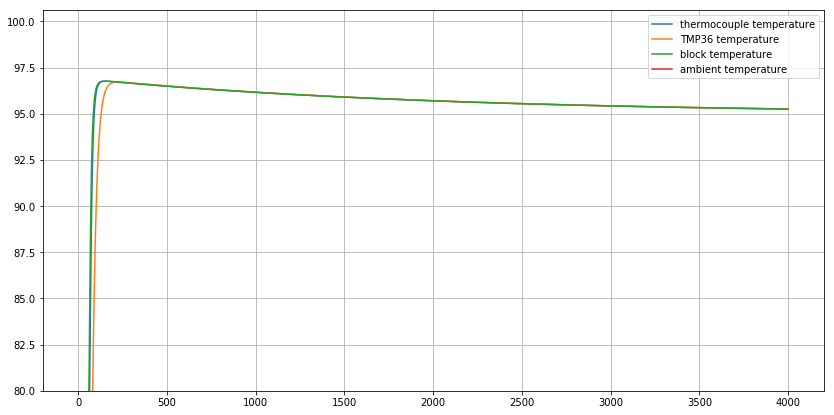

In [23]:

sol = solve_ivp(dTdt, [0, 4000], To, method = 'RK23', t_eval=linspace(0,4000,1000),max_step=1)
#sol = solve_ivp(dTdt, [0, 4000], To, method = 'Radau', t_eval=linspace(0,4000,1000))
#sol = solve_ivp(dTdt, [0, 4000], To, method = 'LSODA', t_eval=linspace(0,4000,1000))
for i in range(0,4): plot(sol.t,sol.y[i],label=Tlabels[i])
ylim(80)
legend()
grid()
